In [46]:
import pandas as pd
import os

In [47]:
files = [file for file in os.listdir("/content/drive/MyDrive/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data")]

In [48]:
all_data = pd.DataFrame()

In [49]:
for file in files:
  df = pd.read_csv("/content/drive/MyDrive/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
  all_data = pd.concat([all_data,df])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


#CLEAN DATA


In [50]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
282,NaN,NaN,NaN,NaN,NaN,NaN
509,NaN,NaN,NaN,NaN,NaN,NaN
838,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN
1169,NaN,NaN,NaN,NaN,NaN,NaN
1396,NaN,NaN,NaN,NaN,NaN,NaN
1606,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN
2033,NaN,NaN,NaN,NaN,NaN,NaN
2555,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
all_data = all_data.dropna(how ="all")

In [52]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


#1 WHAT WAS BEST MONTH FOR SALES


In [53]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


In [54]:
all_data['Month'] = all_data['Order Date'].str[0:2]

In [55]:
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10


In [56]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int64')
all_data['Price Each'] = all_data['Price Each'].astype('float64')

In [57]:
all_data['Total Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99


In [58]:
results = all_data.groupby('Month').sum()

<ipython-input-58-d9e765394c87>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


In [59]:
import matplotlib.pyplot as plt

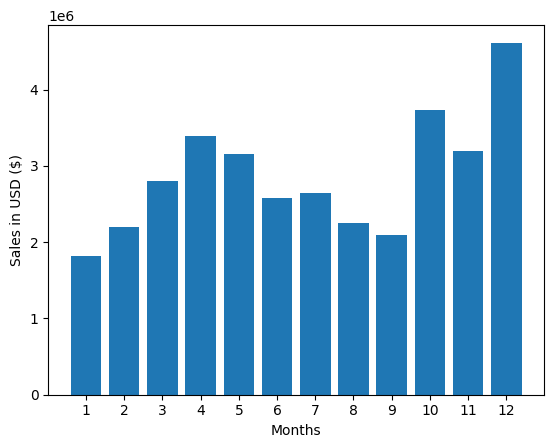

In [60]:
months = range(1,13)
plt.bar(months, results['Total Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months')
plt.show()


#What city had the highest number of sales

In [61]:
all_data.head()
#let's use .apply





,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99


In [62]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data['State'] = all_data['Purchase Address'].str[-8:-6]
all_data['City'] = all_data['City'] + ' (' + all_data['State'] + ')'
all_data = all_data.drop(columns = 'State')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas (TX)
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles (CA)
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98,New York City (NY)
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City (NY)
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles (CA)


In [63]:
cities = all_data.groupby('City').sum()
cities

<ipython-input-63-d49bef93e34a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cities = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Total Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


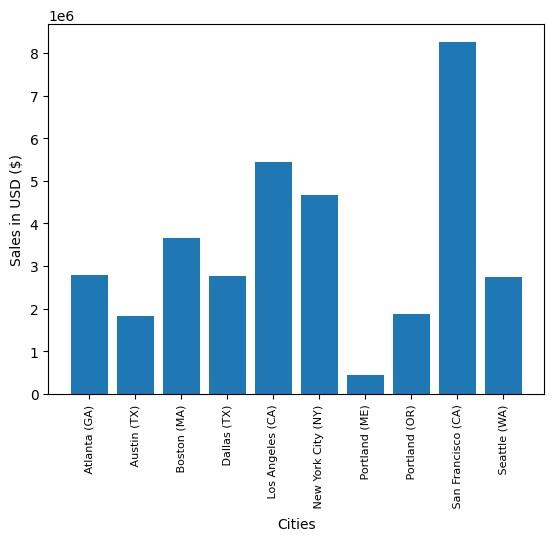

In [64]:
all_cities = [city for city,df in all_data.groupby('City')]
plt.bar(all_cities, cities['Total Sales'])
plt.xticks(all_cities,rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.show()


#3 What time should we display ads to maximize likelihood of customer's buying product

In [65]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [66]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minutes'] = all_data['Order Date'].dt.minute
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minutes
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas (TX),10,56
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles (CA),17,26
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10,5.98,New York City (NY),17,20
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City (NY),22,26
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles (CA),16,10


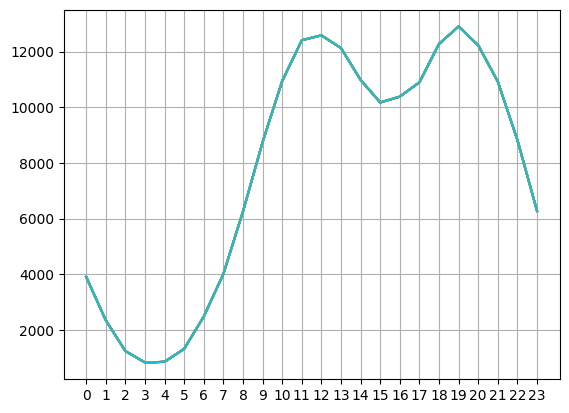

In [67]:
hours = [hour for hour,df in all_data.groupby('Hour')]
plt.xticks(hours)
plt.grid()
plt.plot(hours, all_data.groupby(['Hour']).count())

#4 what products are most often sold together?


In [68]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minutes
62,259420,Google Phone,1,600.00,2019-10-18 08:54:00,"791 Forest St, Los Angeles, CA 90001",10,600.00,Los Angeles (CA),8,54
63,259420,USB-C Charging Cable,2,11.95,2019-10-18 08:54:00,"791 Forest St, Los Angeles, CA 90001",10,23.90,Los Angeles (CA),8,54
65,259422,Google Phone,1,600.00,2019-10-05 04:53:00,"849 Ridge St, San Francisco, CA 94016",10,600.00,San Francisco (CA),4,53
66,259422,USB-C Charging Cable,1,11.95,2019-10-05 04:53:00,"849 Ridge St, San Francisco, CA 94016",10,11.95,San Francisco (CA),4,53
82,259438,iPhone,1,700.00,2019-10-29 09:47:00,"176 5th St, Los Angeles, CA 90001",10,700.00,Los Angeles (CA),9,47
83,259438,Lightning Charging Cable,1,14.95,2019-10-29 09:47:00,"176 5th St, Los Angeles, CA 90001",10,14.95,Los Angeles (CA),9,47
103,259458,34in Ultrawide Monitor,1,379.99,2019-10-08 09:08:00,"728 1st St, Portland, OR 97035",10,379.99,Portland (OR),9,8
104,259458,ThinkPad Laptop,1,999.99,2019-10-08 09:08:00,"728 1st St, Portland, OR 97035",10,999.99,Portland (OR),9,8
123,259477,LG Dryer,1,600.00,2019-10-12 09:38:00,"822 North St, San Francisco, CA 94016",10,600.00,San Francisco (CA),9,38
124,259477,AAA Batteries (4-pack),1,2.99,2019-10-12 09:38:00,"822 North St, San Francisco, CA 94016",10,2.99,San Francisco (CA),9,38


In [69]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head(10)

<ipython-input-69-fb93359521e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minutes,Grouped
62,259420,Google Phone,1,600.00,2019-10-18 08:54:00,"791 Forest St, Los Angeles, CA 90001",10,600.00,Los Angeles (CA),8,54,"Google Phone,USB-C Charging Cable"
63,259420,USB-C Charging Cable,2,11.95,2019-10-18 08:54:00,"791 Forest St, Los Angeles, CA 90001",10,23.90,Los Angeles (CA),8,54,"Google Phone,USB-C Charging Cable"
65,259422,Google Phone,1,600.00,2019-10-05 04:53:00,"849 Ridge St, San Francisco, CA 94016",10,600.00,San Francisco (CA),4,53,"Google Phone,USB-C Charging Cable"
66,259422,USB-C Charging Cable,1,11.95,2019-10-05 04:53:00,"849 Ridge St, San Francisco, CA 94016",10,11.95,San Francisco (CA),4,53,"Google Phone,USB-C Charging Cable"
82,259438,iPhone,1,700.00,2019-10-29 09:47:00,"176 5th St, Los Angeles, CA 90001",10,700.00,Los Angeles (CA),9,47,"iPhone,Lightning Charging Cable"
83,259438,Lightning Charging Cable,1,14.95,2019-10-29 09:47:00,"176 5th St, Los Angeles, CA 90001",10,14.95,Los Angeles (CA),9,47,"iPhone,Lightning Charging Cable"
103,259458,34in Ultrawide Monitor,1,379.99,2019-10-08 09:08:00,"728 1st St, Portland, OR 97035",10,379.99,Portland (OR),9,8,"34in Ultrawide Monitor,ThinkPad Laptop"
104,259458,ThinkPad Laptop,1,999.99,2019-10-08 09:08:00,"728 1st St, Portland, OR 97035",10,999.99,Portland (OR),9,8,"34in Ultrawide Monitor,ThinkPad Laptop"
123,259477,LG Dryer,1,600.00,2019-10-12 09:38:00,"822 North St, San Francisco, CA 94016",10,600.00,San Francisco (CA),9,38,"LG Dryer,AAA Batteries (4-pack)"
124,259477,AAA Batteries (4-pack),1,2.99,2019-10-12 09:38:00,"822 North St, San Francisco, CA 94016",10,2.99,San Francisco (CA),9,38,"LG Dryer,AAA Batteries (4-pack)"


In [71]:
df = df[['Order ID', 'Grouped']].drop_duplicates()

In [72]:
df.head(10)

,Order ID,Grouped
62,259420,"Google Phone,USB-C Charging Cable"
65,259422,"Google Phone,USB-C Charging Cable"
82,259438,"iPhone,Lightning Charging Cable"
103,259458,"34in Ultrawide Monitor,ThinkPad Laptop"
123,259477,"LG Dryer,AAA Batteries (4-pack)"
176,259529,"iPhone,Apple Airpods Headphones,Wired Headphones"
186,259537,"AAA Batteries (4-pack),USB-C Charging Cable"
204,259554,"Apple Airpods Headphones,USB-C Charging Cable"
235,259584,"iPhone,Lightning Charging Cable"
259,259607,"iPhone,Lightning Charging Cable"


In [88]:
from itertools import combinations
from collections import Counter

In [89]:
 count = Counter()

 for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,2)))

In [90]:
print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [92]:
for key,val in count.most_common(10):
  print(key, val)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [93]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minutes
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas (TX),10,56
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles (CA),17,26
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10,5.98,New York City (NY),17,20
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City (NY),22,26
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles (CA),16,10
5,259363,AAA Batteries (4-pack),1,2.99,2019-10-01 18:55:00,"976 Lake St, New York City, NY 10001",10,2.99,New York City (NY),18,55
6,259364,Wired Headphones,1,11.99,2019-10-29 11:02:00,"874 North St, Los Angeles, CA 90001",10,11.99,Los Angeles (CA),11,2
7,259365,Lightning Charging Cable,1,14.95,2019-10-29 11:19:00,"127 12th St, Los Angeles, CA 90001",10,14.95,Los Angeles (CA),11,19
8,259366,Apple Airpods Headphones,1,150.00,2019-10-20 11:52:00,"955 9th St, Los Angeles, CA 90001",10,150.00,Los Angeles (CA),11,52
9,259367,Apple Airpods Headphones,1,150.00,2019-10-16 16:19:00,"742 14th St, San Francisco, CA 94016",10,150.00,San Francisco (CA),16,19


In [94]:
products = all_data.groupby('Product')

In [95]:
products.sum()

<ipython-input-95-0dae1aefed32>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  products.sum()


,Quantity Ordered,Price Each,Month,Total Sales,Hour,Minutes
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


In [98]:
quantity = products.sum()['Quantity Ordered']


<ipython-input-98-e1d5cf9656c5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity = products.sum()['Quantity Ordered']


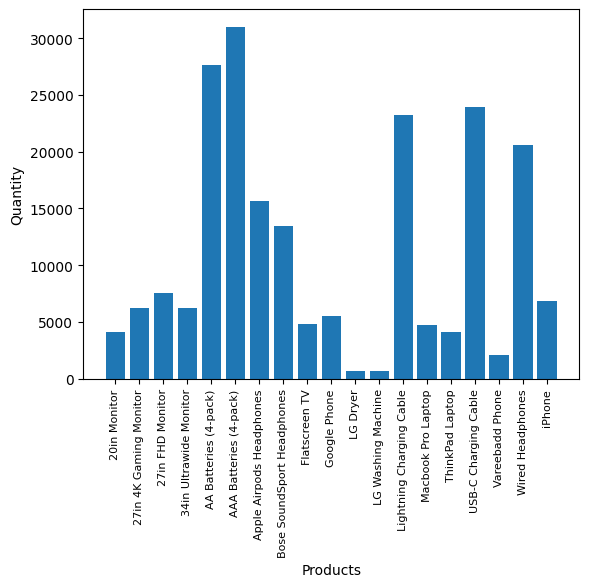

In [103]:
all_products = [product for product, df in products]
plt.bar(all_products, quantity)
plt.xticks(all_products,rotation = 'vertical', size = 8)
plt.ylabel('Quantity')
plt.xlabel('Products')
plt.show()

In [104]:
prices = all_data.groupby('Product').mean()['Price Each']
prices

<ipython-input-104-637facad2d0b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-107-2116e17c2eb8>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(all_products, rotation = 'vertical', size = 8)


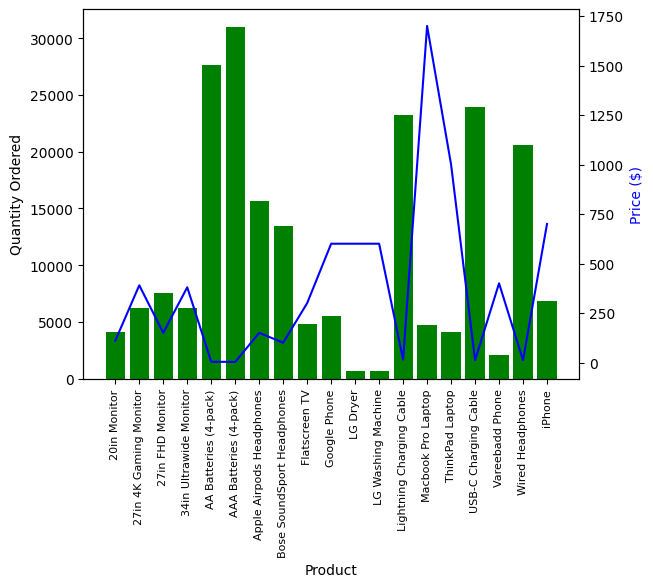

In [107]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(all_products, quantity, color = 'g')
ax2.plot(all_products, prices,'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price ($)', color = 'b')
ax1.set_xticklabels(all_products, rotation = 'vertical', size = 8)

plt.show()